# Классификация

In [1]:
# Импортируем модуль для работы с данными
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# Импортируем модули для работы с моделями
import numpy as np
from sklearn import linear_model, metrics, svm, neighbors
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Описание набора данных и решаемой задачи
Набор данных загружен с сайта kaggle по ссылке:
https://www.kaggle.com/uciml/mushroom-classification

В этом наборе данных включены описания гипотетических образцов, соответствующих 23 видам жаберных грибов семейства Agaricus и Lepiota, взятых из Полевого справочника Общества Одюбона по североамериканским грибам (1981). Каждый вид определяется как определенно съедобный, определенно ядовитый или съедобный неизвестного вида и не рекомендуется. Последний класс был объединен с ядовитым.
Набор формируется из 22 атрибутов и целевой переменной, обозначающей класс съедобности:

0. class - класс (целевая переменная) съедобный=e, ядовитый=p;
1. cap-shape - форма шапочки: b=колокольчик, c=конический, x=выпуклый, f=плоский, k=выпяченный, s=утопленный;
2. cap-surface - поверхность шапочки: f=волокнистая, g=с бороздками, y=чешуйчатая, s=гладкая;
3. cap-color - цвет шапочки: n=коричневый, b=желтовато-коричневый, c=корица, g=серый, r=зелёный, p=розовый, u=фиолетовый, e=красный, w=белый, y=жёлтый;
4. bruises - синяки: t=Истина, f=Ложь;
5. odor - запах: миндальный=a, анис=l, креозот=c, рыбный=y, неприятный=f, затхлый=m, нет=n, острый=p, пряный=s;
6. gill-attachment - жаберное прикрепление: прикреплено=a, нисходящее=d, свободное=f, зубчатое=n;
7. gill-spacing - расстояние между жабрами: близко=c, тесно=w, далеко=d;
8. gill-size - размер жабр: широкий=b, узкий=n;
9. gill-color - цвет жабр: черный=k, коричневый=n, желтовато-коричневый=b, шоколадный=h, серый=g, зеленый=r, оранжевый=o, розовый=p, фиолетовый=u, красный=e, белый=w, желтый=у;
10. stalk-shape - форма стебля: увеличение=e, сужение=t;
11. stalk-root - стебель-корень: луковичный=b, булавидный=с, чашка=u, равный=e, ризоморфы=z, укорененный=r, отсутствует=?;
12. stalk-surface-above-ring - поверхность стебля над кольцом: волокнистая=f, чешуйчатая=y, шелковистая=k, гладкая=s;
13. stalk-surface-below ring -  поверхность стебля под кольцом: волокнистый=f, чешуйчатый=y, шелковистый=k, гладкий=s;
14. stakl-color-above-ring - цвет стебля над кольцом: коричневый=n, желтовато-коричневый=b, коричный=c, серый=g, оранжевый=o, розовый=p, красный=e, белый=w, желтый=y;
15. stakl-color-below-ring - цвет стебля под кольцом: коричневый=n, желтовато-коричневый=b, коричный=c, серый=g, оранжевый=o, розовый=p, красный=e, белый=w, желтый=y;
16. veil-type - тип покрова: частичная=p, полная=u;
17. veil-color - цвет покрова: коричневый=n, оранжевый=o, белый=w, желтый=y;
18. ring-number - количество колец: нет=n, один=o, два=t;
19. ring-type - тип кольца: паутина=c, исчезающий=e, вспыхивающий=f, большой=l, нет=n, подвесной=p, оболочка=s, зональный=z;
20. spore-print-color - цвет спорового отпечатка: черный=k, коричневый=n, желтовато-коричневый=b, шоколадный=h, зеленый=r, оранжевый=o, фиолетовый=u, белый=w, желтый=y;
21. population - популяция: изобилие=a, сгруппированная=c, многочисленная=n, рассеянная=s, несколько=v, одиночная=y;
22. habitat - среда обитания: трава=g, листья=l, луга=m, тропинки=p, город=u,отходы=w, леса=d.

**Постановка задачи:**
Необходимо на основе описания характеристик гриба определить его класс как съедобного или ядовитого. Целевую переменную можно представить бинарными значенями. Таким образом, задача сводится к бинарной классификации. Решение задачи достигается путём решения задачи оптимизации параметров модели, при которых достигается оптимальная точность предсказания модели.

### Подключение данных

In [2]:
df = pd.read_csv('mushrooms.csv')
display(df.head(5))     # Выведем данные (первые пять)
display(df.describe())  # Выведем описание данных
display(df.dtypes)    # Выведем типы данных

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

### Выделим целевые и факторные переменные

In [3]:
target_var = df.iloc[:,0]       # iloc позволяет обращаться к данным по индексу
factor_vars = df.iloc[:,1:]     # делаем срезы по столбцам

print("Целевая переменная:", target_var.name)
print("Факторные переменные:", ', '.join(set(factor_vars.columns)))

Целевая переменная: class
Факторные переменные: bruises, stalk-color-above-ring, cap-surface, stalk-root, ring-number, ring-type, population, gill-attachment, stalk-shape, habitat, gill-size, cap-color, spore-print-color, stalk-surface-below-ring, stalk-surface-above-ring, stalk-color-below-ring, gill-spacing, veil-type, odor, veil-color, cap-shape, gill-color


### Преобразование данных

In [4]:
# Целевой переменной зададим бинарные значения
df.loc[df["class"]=="e", "class"] = 1
df.loc[df["class"]=="p", "class"] = 0

# Применяем One-hot encoding
temp_df = df["class"]
df = df.drop(axis=1, columns=["class"])
df = pd.get_dummies(df)
df.insert(loc=0, column="class", value=temp_df.values)

display(df)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### Удаление ненужных данных, анализ отсутствующих значений

class          0
cap-shape_b    0
cap-shape_c    0
cap-shape_f    0
cap-shape_k    0
              ..
habitat_l      0
habitat_m      0
habitat_p      0
habitat_u      0
habitat_w      0
Length: 118, dtype: int64

Корреляционный коэффициент между столбцами stalk-surface-below-ring_y и stalk-root_r равен 0.8174442116132162
Корреляционный коэффициент между столбцами stalk-color-above-ring_o и gill-attachment_a равен 0.9550973436312871
Корреляционный коэффициент между столбцами stalk-color-below-ring_o и gill-attachment_a равен 0.9550973436312871
Корреляционный коэффициент между столбцами veil-color_w и gill-attachment_f равен 0.9352375509363872
Корреляционный коэффициент между столбцами spore-print-color_h и ring-type_l равен 0.8689302627422747
Корреляционный коэффициент между столбцами spore-print-color_w и gill-color_b равен 0.8055732780196003
Корреляционный коэффициент между столбцами spore-print-color_w и stalk-root_? равен 0.8865409947282424


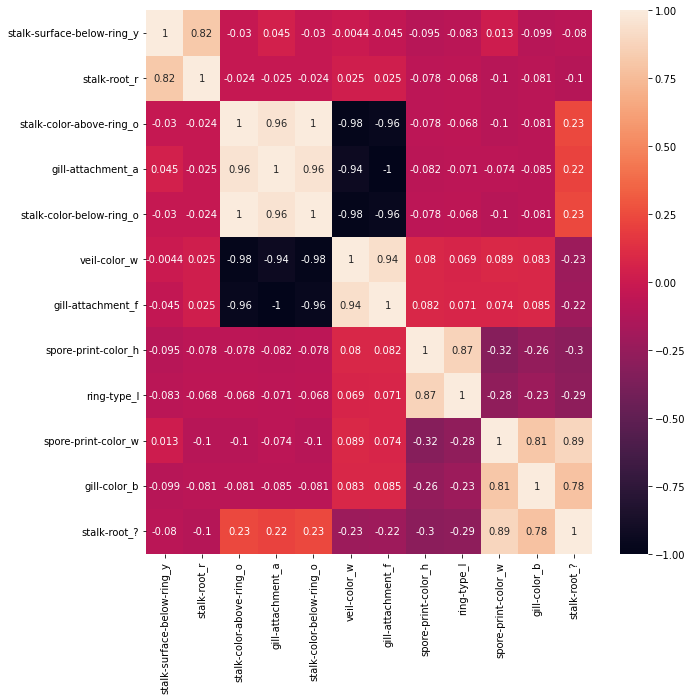

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [5]:
display(df.isna().sum())        # Проверяем наличие отсутствующих данных


# Приступим к выявлению корреляций между переменными
# Учтём, что столбец "class" не учитывается в корреляционной матрице
corr_mtx = df.corr().to_numpy()
corr_columns = []
for i in range(corr_mtx.shape[0]):
    for j in range(corr_mtx.shape[1]):
        if corr_mtx[i][j] >= 0.8 and corr_mtx[i][j] < 1 and i > j:
            print(f"Корреляционный коэффициент между столбцами {df.columns[i+1]} и {df.columns[j+1]} равен {corr_mtx[i][j]}")
            if df.columns[i+1] not in corr_columns: corr_columns.append(df.columns[i+1])
            if df.columns[j+1] not in corr_columns: corr_columns.append(df.columns[j+1])

plt.figure(figsize=(10, 10))
sb.heatmap(df[corr_columns].corr(), annot=True)
plt.show()

# Удалим 7 столбцов
columns_to_drop = ['stalk-surface-below-ring_y', 'stalk-color-above-ring_o',
                    'stalk-color-below-ring_o', 'veil-color_w', 'spore-print-color_h',
                    'spore-print-color_w', 'stalk-root_?']
df = df.drop(axis=1, columns=columns_to_drop)
display(df)

### Оценим баланс классов
Классы сбалансированы

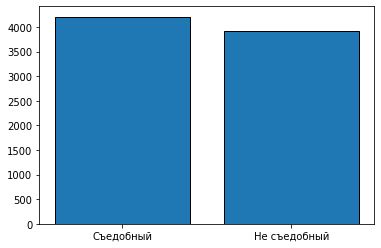

In [6]:
plt.bar(['Съедобный', 'Не съедобный'], df['class'].value_counts(), edgecolor='black')
plt.show()

### Разбиение выборки на обучающую и тестовую выборки

In [7]:
# Перемешаем датасет
df = df.sample(frac=1).reset_index(drop=True)
train_df = df.iloc[:6094, :].astype("float32")                          # Делаем срез первых 6093 строк по всем колонкам
test_df = df.iloc[6094:, :].reset_index(drop=True).astype("float32")    # Проводим аналогичную операцию для остальных строк

# Выведем результат
print("train_df:", train_df.shape)
display(train_df.head(5))
print("test_df:", test_df.shape)
display(test_df.head(5))

train_df: (6094, 111)


,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


test_df: (2030, 111)


,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Логистическая регрессия

Метрика достоверности предсказания: 1.0
Метрика точности: 1.0
Метрика полноты: 1.0
Отчёт классификации:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       965
         1.0       1.00      1.00      1.00      1065

    accuracy                           1.00      2030
   macro avg       1.00      1.00      1.00      2030
weighted avg       1.00      1.00      1.00      2030

Матрица классификации:
 [[ 965    0]
 [   0 1065]]
------------------------------
Пример расчёта значения целевой переменной по входным значениям
Значение рассчитанной целевой переменной: [1.]
Интерпретация значения переменной: 1
Истинное значение переменной: 1.0


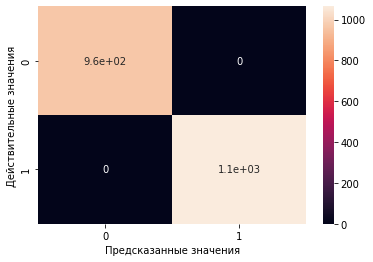

In [8]:
# Инициализируем модель
log_reg = linear_model.LogisticRegression()

# Обучение модели
X_train = train_df.iloc[:,1:]
Y_train = train_df.iloc[:,0]
log_reg.fit(X_train, Y_train)

# Оценим модель
X_test = test_df.iloc[:,1:]
Y_test = test_df.iloc[:,0]
print("Метрика достоверности предсказания:", metrics.accuracy_score(Y_test, log_reg.predict(X_test)))
print("Метрика точности:", metrics.precision_score(Y_test, log_reg.predict(X_test)))
print("Метрика полноты:", metrics.recall_score(Y_test, log_reg.predict(X_test)))
print("Отчёт классификации:\n", metrics.classification_report(Y_test, log_reg.predict(X_test)))
print("Матрица классификации:\n", metrics.confusion_matrix(Y_test, log_reg.predict(X_test)))

# Графическая форма
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sb.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, log_reg.predict(X_test))),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

# Пример расчёта значения целевой переменной по входным значениям
log_reg_result = log_reg.predict([X_test.iloc[1,:]])
log_result = 1 if log_reg_result >= 0.5 else 0
print("------------------------------")
print("Пример расчёта значения целевой переменной по входным значениям")
print("Значение рассчитанной целевой переменной:", log_reg_result)
print("Интерпретация значения переменной:", log_result)
print("Истинное значение переменной:", Y_train[1])

### SVM (метод опорных векторов)

Метрика достоверности предсказания: 1.0
Метрика точности: 1.0
Метрика полноты: 1.0
Отчёт классификации:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       965
         1.0       1.00      1.00      1.00      1065

    accuracy                           1.00      2030
   macro avg       1.00      1.00      1.00      2030
weighted avg       1.00      1.00      1.00      2030

Матрица классификации:
 [[ 965    0]
 [   0 1065]]
------------------------------
Пример расчёта значения целевой переменной по входным значениям
Значение рассчитанной целевой переменной: [1.]
Интерпретация значения переменной: 1
Истинное значение переменной: 1.0


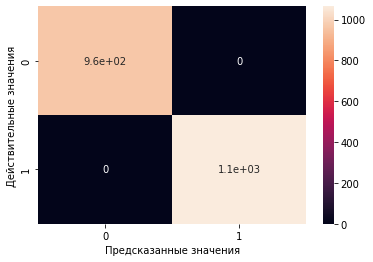

In [9]:
# Инициализируем модель
svm_model = svm.SVC()

# Обучение модели
X_train = train_df.iloc[:,1:]
Y_train = train_df.iloc[:,0]
svm_model.fit(X_train, Y_train)

# Оценим модель
X_test = test_df.iloc[:,1:]
Y_test = test_df.iloc[:,0]
print("Метрика достоверности предсказания:", metrics.accuracy_score(Y_test, svm_model.predict(X_test)))
print("Метрика точности:", metrics.precision_score(Y_test, svm_model.predict(X_test)))
print("Метрика полноты:", metrics.recall_score(Y_test, svm_model.predict(X_test)))
print("Отчёт классификации:\n", metrics.classification_report(Y_test, svm_model.predict(X_test)))
print("Матрица классификации:\n", metrics.confusion_matrix(Y_test, svm_model.predict(X_test)))

# Графическая форма
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sb.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, svm_model.predict(X_test))),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

# Пример расчёта значения целевой переменной по входным значениям
svm_model_result = svm_model.predict([X_test.iloc[1,:]])
result = 1 if svm_model_result >= 0.5 else 0
print("------------------------------")
print("Пример расчёта значения целевой переменной по входным значениям")
print("Значение рассчитанной целевой переменной:", svm_model_result)
print("Интерпретация значения переменной:", result)
print("Истинное значение переменной:", Y_train[1])

### KNN (метод k ближайших соседей)

Лучшая модель: KNeighborsClassifier(n_neighbors=3)
Метрика достоверности предсказания: 1.0
Метрика точности: 1.0
Метрика полноты: 1.0
Отчёт классификации:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       965
         1.0       1.00      1.00      1.00      1065

    accuracy                           1.00      2030
   macro avg       1.00      1.00      1.00      2030
weighted avg       1.00      1.00      1.00      2030

Матрица классификации:
 [[ 965    0]
 [   0 1065]]
------------------------------
Пример расчёта значения целевой переменной по входным значениям
Значение рассчитанной целевой переменной: [1.]
Интерпретация значения переменной: 1
Истинное значение переменной: 1.0


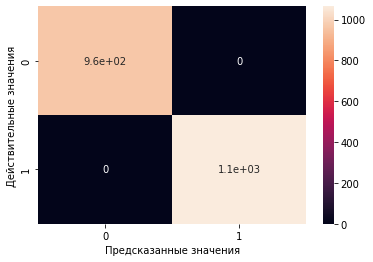

In [10]:
 # Инициализируем модель
number_of_neighbors = np.arange(3, 10) # количество соседей для перебора
knn_model = neighbors.KNeighborsClassifier()
params = {'n_neighbors':number_of_neighbors}
grid_search = GridSearchCV(estimator = knn_model, param_grid = params, cv = 6) # задание параметров поиска по сетке

# Обучение модели
X_train = train_df.iloc[:,1:]
Y_train = train_df.iloc[:,0]
grid_search.fit(X_train, Y_train)

# Оценим модель
X_test = test_df.iloc[:,1:]
Y_test = test_df.iloc[:,0]
print('Лучшая модель:', grid_search.best_estimator_) # лучшая модель получается при k = 3
print("Метрика достоверности предсказания:", metrics.accuracy_score(Y_test, grid_search.predict(X_test)))
print("Метрика точности:", metrics.precision_score(Y_test, grid_search.predict(X_test)))
print("Метрика полноты:", metrics.recall_score(Y_test, grid_search.predict(X_test)))
print("Отчёт классификации:\n", metrics.classification_report(Y_test, grid_search.predict(X_test)))
print("Матрица классификации:\n", metrics.confusion_matrix(Y_test, grid_search.predict(X_test)))

# Графическая форма
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sb.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, grid_search.predict(X_test))),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

# Пример расчёта значения целевой переменной по входным значениям
grid_search_result = grid_search.predict([X_test.iloc[1,:]])
result = 1 if grid_search_result >= 0.5 else 0
print("------------------------------")
print("Пример расчёта значения целевой переменной по входным значениям")
print("Значение рассчитанной целевой переменной:", grid_search_result)
print("Интерпретация значения переменной:", result)
print("Истинное значение переменной:", Y_train[1]);